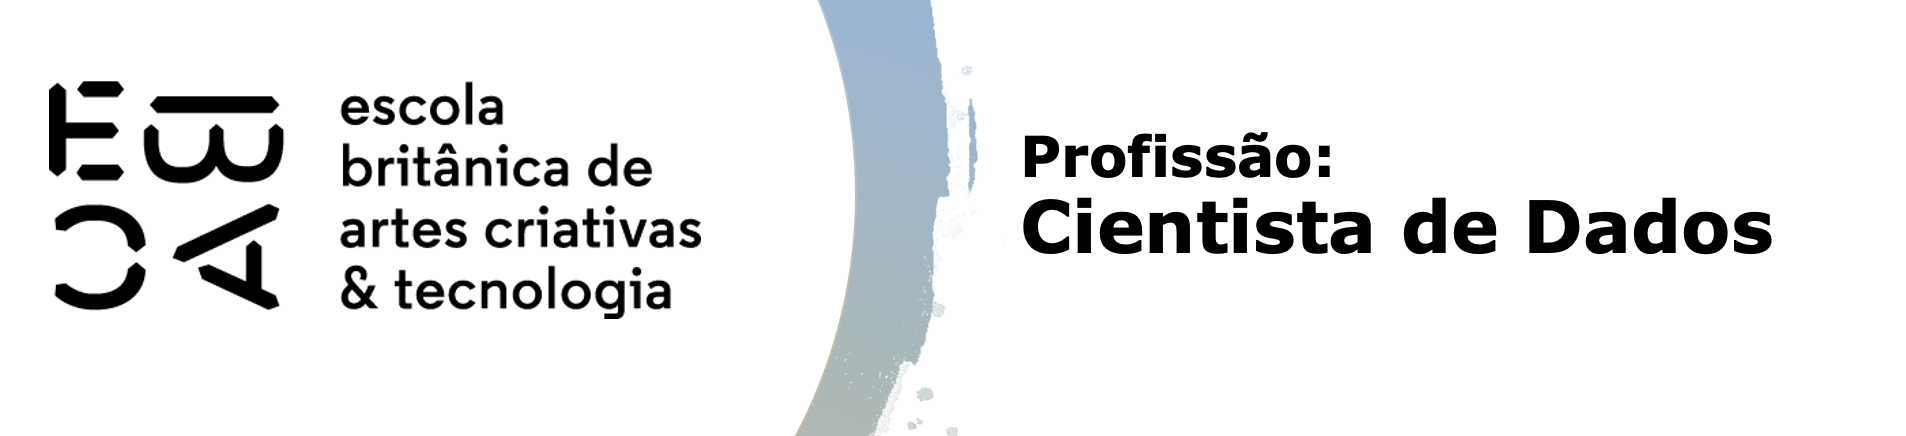

# Tarefa: Inferência

In [48]:
# IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st


%matplotlib inline

In [49]:
pg = sns.load_dataset('penguins')

In [50]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

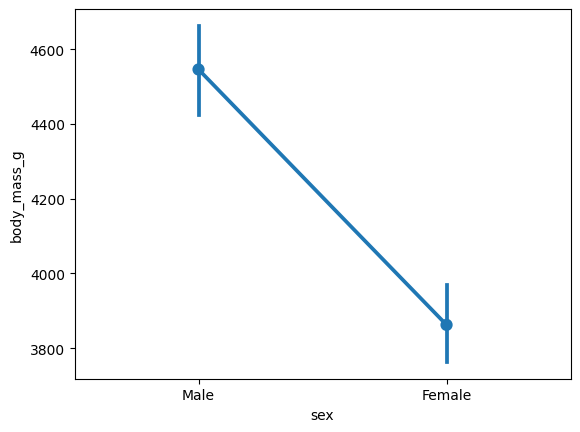

In [51]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [52]:
pg.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [53]:
# Calculando a média do peso corporal para cada sexo:
mean_male = pg[pg['sex'] == 'Male']['body_mass_g'].mean()
mean_female = pg[pg['sex'] == 'Female']['body_mass_g'].mean()

# Calculando a variância do peso corporal para cada sexo e depois a média dessas variâncias:
variance = pg.groupby('sex')['body_mass_g'].var().mean()

# Calculando o desvio padrão a partir da variância:
std_dev = variance**0.5

# Calculando a diferença entre as médias:
difference = mean_male - mean_female

# Calculando o erro padrão:
std_error = std_dev * ((2/10)**0.5)


# Calculando a estatística do teste t:
t_stat = difference / std_error

# Calculando a região crítica para um nível de significância de 5%:
critical_region = st.t.ppf(0.95, 18)

# Calculando o p_value
p_value = 1 - st.t.cdf(t_stat, 18)



print(f'Diferença das médias: {difference:.2f}')
print(f'Desvio padrão: {std_dev:.2f}')
print(f'Erro padrão: {std_error:.2f}')
print(f'Estatística do teste t: {t_stat:.2f}')
print(f'Região crítica: {critical_region:.2f} ou mais')
print(f'P_value: {p_value:.5f} ou mais')


Diferença das médias: 683.41
Desvio padrão: 729.43
Erro padrão: 326.21
Estatística do teste t: 2.09
Região crítica: 1.73 ou mais
P_value: 0.02529 ou mais


Os resultados do seu teste t indicam que a diferença das médias de peso corporal entre pinguins machos e fêmeas é de 683.41 gramas, com um desvio padrão de 729.43 gramas. O erro padrão, que é uma medida da incerteza em torno da estimativa da média, é de 326.21 gramas.

>A estatística do teste t é de 2.09. Isso é maior do que o valor crítico de 1.73, o que significa que a diferença observada é estatisticamente significativa no nível de 5%.

O valor p do teste é de 0.02529. Como este valor é menor que 0.05, pode-se rejeitar a hipótese nula de que não há diferença no peso corporal entre pinguins machos e fêmeas. Isso sugere que a diferença que observada na amostra é estatisticamente significativa, e é improvável que tenha ocorrido por acaso.

*Portanto, com base nesses resultados, parece que há uma diferença significativa no peso corporal entre pinguins machos e fêmeas.*

## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

A probabilidade para valores entre 1.73 e inf é de 5.00%


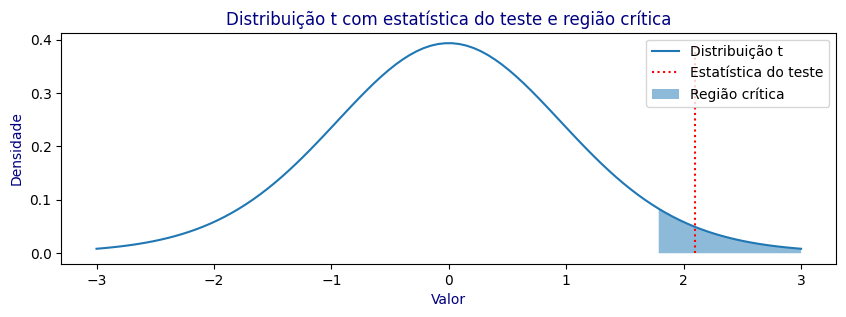

In [54]:
# Parâmetros da densidade sob H0
mu = 0
variance = 1
sigma = variance**0.5

# Valores de X e Y para plotar a densidade
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = st.t.pdf(x, 18)

# low = início da região crítica do teste
low = st.t.ppf(.95, 18)
high = np.inf

# Criando a figura
fig, ax = plt.subplots(figsize=(10,3))

# Gráfico da densidade
ax.plot(x, y, label='Distribuição t')

# Esta linha de referência marca o valor observado da estatística do teste
ax.vlines(x=[t_stat], ymin=0, ymax=y.max(), colors='r', linestyles='dotted', label='Estatística do teste')

# Área sob a curva que representa a região crítica
plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5, label='Região crítica')

# Probabilidade de X pertencer à área
prob_area = st.t.cdf(high, 18) - st.t.cdf(low, 18)

# Adicionando legendas aos eixos e um título ao gráfico
ax.set_xlabel('Valor', color = 'navy')
ax.set_ylabel('Densidade', color = 'navy')
ax.set_title('Distribuição t com estatística do teste e região crítica', color = 'navy')

# Adicionando legenda
ax.legend()

print(f'A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}')

# Mostrar o gráfico
plt.show()


## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [55]:
# Obtendo as espécies únicas no conjunto de dados:
species = pg['species'].unique()

# realizando o teste t Para cada espécie:
for sp in species:
    # Filtrando o conjunto de dados para apenas a espécie atual
    pg_species = pg[pg['species'] == sp]

    # Separando os pesos dos pinguins machos e fêmeas
    male_weights = pg_species[pg_species['sex'] == 'Male']['body_mass_g']
    female_weights = pg_species[pg_species['sex'] == 'Female']['body_mass_g']

    # Calculando a diferença das médias
    difference = male_weights.mean() - female_weights.mean()

    # Calculando a variância do peso corporal para cada sexo e depois a média dessas variâncias
    variance = pg_species.groupby('sex')['body_mass_g'].var().mean()

    # Calculando o desvio padrão a partir da variância
    std_dev = variance**0.5

    # Calculando o erro padrão
    std_error = std_dev * ((2/10)**0.5)

    # Realizando o teste t
    t_stat, p_value = st.ttest_ind(male_weights, female_weights)

    # Calculando a região crítica para um nível de significância de 5%
    critical_region = st.t.ppf(0.95, 18)

    print(f'\nESPÉCIE: {sp}')
    print(f'Diferença das médias: {difference:.2f}')
    print(f'Desvio padrão: {std_dev:.2f}')
    print(f'Erro padrão: {std_error:.2f}')
    print(f'Estatística do teste t: {t_stat:.2f}')
    print(f'Região crítica: {critical_region:.2f} ou mais')
    print(f'P_Value: {p_value:.8f} ou mais')




ESPÉCIE: Adelie
Diferença das médias: 674.66
Desvio padrão: 310.52
Erro padrão: 138.87
Estatística do teste t: 13.13
Região crítica: 1.73 ou mais
P_Value: 0.00000000 ou mais

ESPÉCIE: Chinstrap
Diferença das médias: 411.76
Desvio padrão: 326.01
Erro padrão: 145.79
Estatística do teste t: 5.21
Região crítica: 1.73 ou mais
P_Value: 0.00000204 ou mais

ESPÉCIE: Gentoo
Diferença das médias: 805.09
Desvio padrão: 297.79
Erro padrão: 133.17
Estatística do teste t: 14.72
Região crítica: 1.73 ou mais
P_Value: 0.00000000 ou mais


### Análise:

* **ESPÉCIE ADELIE:** A estatística do teste t é de 13.13, que é maior do que o valor crítico de 1.73.
O valor p é praticamente 0, o que significa que a diferença no peso corporal é estatisticamente significativa.


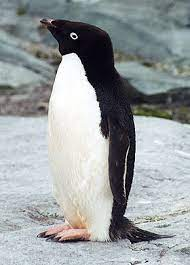

* **ESPÉCIE CHINSTRAP:** A estatística do teste t é de 5.21, que é maior do que o valor crítico de 1.73.
O valor p é de 0.00000204, o que significa que a diferença no peso corporal é estatisticamente significativa.

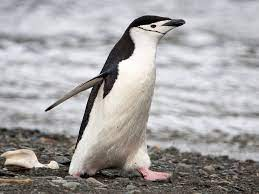

* **ESPÉCIE GENTOO:** A estatística do teste t é de 14.72, que é maior do que o valor crítico de 1.73.
O valor p é praticamente 0, o que significa que a diferença no peso corporal é estatisticamente significativa.


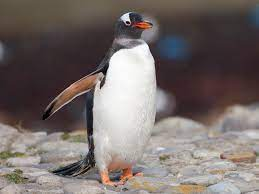

> Portanto, para todas as três espécies de pinguins, a diferença no peso corporal entre machos e fêmeas é estatisticamente significativa.